# Multi-Class Classification Model for Human Activity Recognition with Smartphone Using Python Take 1
### David Lowe
### October 15, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. https://machinelearningmastery.com/

SUMMARY: The purpose of this project is to construct a prediction model using various machine learning algorithms and to document the end-to-end steps using a template. The Human Activities with Smartphone Dataset is a multi-class classification situation where we are trying to predict one of the six possible outcomes.

INTRODUCTION: Researchers collected the datasets from experiments that consist of a group of 30 volunteers with each person performed six activities wearing a smartphone on the waist. With its embedded accelerometer and gyroscope, the research captured measurement for the activities of WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING. The dataset has been randomly partitioned into two sets, where 70% of the volunteers were selected for generating the training data and 30% the test data. 

For this iteration, the script focuses on evaluating various machine learning algorithms and identify the algorithm that produces the best accuracy metric.

CONCLUSION: The baseline performance of the ten algorithms achieved an average accuracy of 84.68%. Three algorithms (Linear Discriminant Analysis, Support Vector Machine, and Stochastic Gradient Boosting) achieved the top three accuracy scores after the first round of modeling. After a series of tuning trials, Stochastic Gradient Boosting turned in the top result using the training data. It achieved an average accuracy of 95.43%. Using the optimized tuning parameter available, the Stochastic Gradient Boosting algorithm processed the validation dataset with an accuracy of 96.23%, which was even better than the accuracy from the training data.

From the model-building activities, the Linear Discriminant Analysis ensemble algorithm achieved the top-notch training and validation results. For the project, Linear Discriminant Analysis should be considered for further modeling or production use.

Dataset Used: Human Activity Recognition Using Smartphone Data Set

Dataset ML Model: Multi-class classification with numerical attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

One potential source of performance benchmarks: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem

### 1.a) Load ibraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [2]:
startTimeScript = datetime.now()

widthVector = [16] * 561
colNames = ["attr" + str(i) for i in range(1,562)]
x_training = pd.read_fwf('X_train.txt', widths=widthVector, header=None, names=colNames)
y_training = pd.read_csv('y_train.txt', names=["targetVar"])
entireDataset = pd.concat([x_training, y_training], axis=1)
x_test = pd.read_fwf('X_test.txt', widths=widthVector, header=None, names=colNames)
y_test = pd.read_csv('y_test.txt', names=["targetVar"])

### 1.c) Set up the key parameters to be used in the script

In [3]:
# Create one random seed number for reproducible results
seedNum = 888

# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1

# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 5
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

#### 2.a.i) Peek at the data itself.

In [4]:
print(entireDataset.head(20))

       attr1     attr2     attr3     attr4     attr5     attr6     attr7  \
0   0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1   0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2   0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3   0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4   0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   
5   0.277199 -0.010098 -0.105137 -0.997335 -0.990487 -0.995420 -0.997627   
6   0.279454 -0.019641 -0.110022 -0.996921 -0.967186 -0.983118 -0.997003   
7   0.277432 -0.030488 -0.125360 -0.996559 -0.966728 -0.981585 -0.996485   
8   0.277293 -0.021751 -0.120751 -0.997328 -0.961245 -0.983672 -0.997596   
9   0.280586 -0.009960 -0.106065 -0.994803 -0.972758 -0.986244 -0.995405   
10  0.276880 -0.012722 -0.103438 -0.994815 -0.973077 -0.985357 -0.995509   
11  0.276228 -0.021441 -0.108202 -0.998246 -0.987214 -0.992727 -0.998251   
12  0.278457

#### 2.a.ii) Dimensions of the dataset.

In [5]:
print(entireDataset.shape)

(7352, 562)


#### 2.a.iii) Types of the attributes.

In [6]:
print(entireDataset.dtypes)

attr1        float64
attr2        float64
attr3        float64
attr4        float64
attr5        float64
attr6        float64
attr7        float64
attr8        float64
attr9        float64
attr10       float64
attr11       float64
attr12       float64
attr13       float64
attr14       float64
attr15       float64
attr16       float64
attr17       float64
attr18       float64
attr19       float64
attr20       float64
attr21       float64
attr22       float64
attr23       float64
attr24       float64
attr25       float64
attr26       float64
attr27       float64
attr28       float64
attr29       float64
attr30       float64
              ...   
attr533      float64
attr534      float64
attr535      float64
attr536      float64
attr537      float64
attr538      float64
attr539      float64
attr540      float64
attr541      float64
attr542      float64
attr543      float64
attr544      float64
attr545      float64
attr546      float64
attr547      float64
attr548      float64
attr549      

#### 2.a.iv) Statistical summary of all attributes.

In [7]:
print(entireDataset.describe())

             attr1        attr2        attr3        attr4        attr5  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.274488    -0.017695    -0.109141    -0.605438    -0.510938   
std       0.070261     0.040811     0.056635     0.448734     0.502645   
min      -1.000000    -1.000000    -1.000000    -1.000000    -0.999873   
25%       0.262975    -0.024863    -0.120993    -0.992754    -0.978129   
50%       0.277193    -0.017219    -0.108676    -0.946196    -0.851897   
75%       0.288461    -0.010783    -0.097794    -0.242813    -0.034231   
max       1.000000     1.000000     1.000000     1.000000     0.916238   

             attr6        attr7        attr8        attr9       attr10  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean     -0.604754    -0.630512    -0.526907    -0.606150    -0.468604   
std       0.418687     0.424073     0.485942     0.414122     0.544547   
min      -1.000000    -1.000000    -1

#### 2.a.v) Summarize the levels of the class attribute.

In [8]:
print(entireDataset.groupby('targetVar').size())

targetVar
1    1226
2    1073
3     986
4    1286
5    1374
6    1407
dtype: int64


#### 2.a.v) Count missing values.

In [9]:
print(entireDataset.isnull().sum())

attr1        0
attr2        0
attr3        0
attr4        0
attr5        0
attr6        0
attr7        0
attr8        0
attr9        0
attr10       0
attr11       0
attr12       0
attr13       0
attr14       0
attr15       0
attr16       0
attr17       0
attr18       0
attr19       0
attr20       0
attr21       0
attr22       0
attr23       0
attr24       0
attr25       0
attr26       0
attr27       0
attr28       0
attr29       0
attr30       0
            ..
attr533      0
attr534      0
attr535      0
attr536      0
attr537      0
attr538      0
attr539      0
attr540      0
attr541      0
attr542      0
attr543      0
attr544      0
attr545      0
attr546      0
attr547      0
attr548      0
attr549      0
attr550      0
attr551      0
attr552      0
attr553      0
attr554      0
attr555      0
attr556      0
attr557      0
attr558      0
attr559      0
attr560      0
attr561      0
targetVar    0
Length: 562, dtype: int64


### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [10]:
attributeOnly = entireDataset.drop(columns=['targetVar'])

In [11]:
# # Histograms for each attribute
# attributeOnly.hist()
# pyplot.show()

In [12]:
# # Density plot for each attribute
# attributeOnly.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
# pyplot.show()

In [13]:
# # Box and Whisker plot for each attribute
# attributeOnly.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
# pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

In [14]:
# # Correlation matrix
# fig = pyplot.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(attributeOnly.corr(), vmin=-1, vmax=1)
# fig.colorbar(cax)
# pyplot.show()

In [15]:
# # Scatterplot matrix
# scatter_matrix(attributeOnly)
# pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [16]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [17]:
# Not applicable for this iteration of the project.

### 3.c) Data Transforms

In [18]:
# Not applicable for this iteration of the project.

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [19]:
array = entireDataset.values
X_train = x_training.values
X_validation = x_test.values
Y_train = y_training.values
Y_validation = y_test.values
X_entire = np.vstack([X_train, X_validation])
Y_entire = np.vstack([Y_train, Y_validation])

print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_train.shape: (7352, 561) Y_train.shape: (7352, 1)
X_validation.shape: (2947, 561) Y_validation.shape: (2947, 1)
X_entire.shape: (10299, 561) Y_entire.shape: (10299, 1)
Total time for data handling and visualization: 0:00:08.310246


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

Linear Algorithm: Linear Discriminant Analysis

Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged Decision Trees, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [20]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [21]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BDT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [22]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

LDA: 0.954304 (0.032270)
Model training time: 0:00:06.134512
CART: 0.848612 (0.054141)
Model training time: 0:00:41.761996


/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

NB: 0.689738 (0.049702)
Model training time: 0:00:01.492814


/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:4

KNN: 0.893093 (0.031621)
Model training time: 0:00:34.594945


/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

SVM: 0.916892 (0.044009)
Model training time: 0:01:09.167442


/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

BDT: 0.884931 (0.046224)
Model training time: 0:04:14.626889


/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458:

RF: 0.899076 (0.025386)
Model training time: 0:00:11.174332


/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458:

ET: 0.911863 (0.027840)
Model training time: 0:00:03.534219


/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

AB: 0.546791 (0.022267)
Model training time: 0:04:07.937068


/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

GBM: 0.923561 (0.044505)
Model training time: 0:44:36.972067
Average metrics (accuracy) from all models: 0.8468861653356996


### 4.b) Spot-checking baseline algorithms

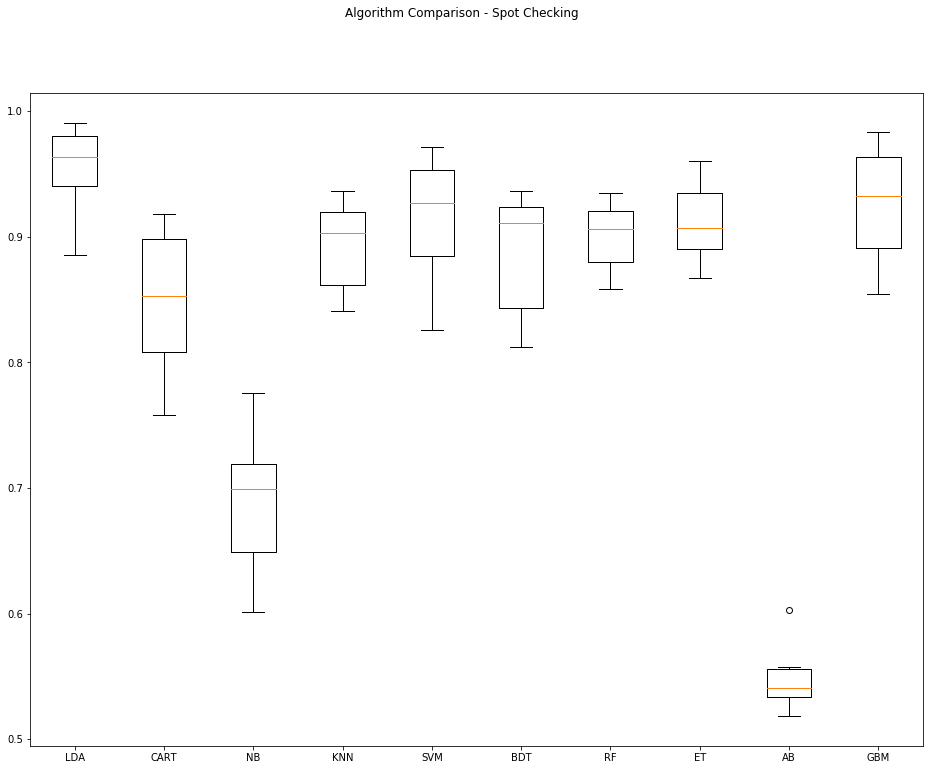

In [23]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [24]:
# Set up the comparison array
results = []
names = []

In [25]:
# Tuning algorithm #1 - Linear Discriminant Analysis
startTimeModule = datetime.now()
model1 = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
cv_results = cross_val_score(model1, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('LDA')
msg = "%s: %f (%f)" % ('LDA', cv_results.mean(), cv_results.std())
print(msg)
print ('Model training time:',(datetime.now() - startTimeModule))

/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

LDA: 0.954304 (0.032270)
Model training time: 0:00:06.138737


/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [26]:
# Tuning algorithm #2 - Support Vector Machine
startTimeModule = datetime.now()
paramGrid2 = dict(C=np.array([1,3,5,7,9]))
model2 = SVC(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('SVM')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Best: 0.940832 using {'C': 9}
0.916893 (0.044010) with: {'C': 1}
0.932535 (0.040010) with: {'C': 3}
0.937568 (0.037079) with: {'C': 5}
0.939064 (0.035421) with: {'C': 7}
0.940832 (0.034752) with: {'C': 9}
Model training time: 0:10:22.498061


In [27]:
# Tuning algorithm #3 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid3 = dict(n_estimators=np.array([100,200,300,400,500]))
model3 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Best: 0.930223 using {'n_estimators': 400}
0.923558 (0.044509) with: {'n_estimators': 100}
0.929407 (0.041613) with: {'n_estimators': 200}
0.929679 (0.042229) with: {'n_estimators': 300}
0.930223 (0.041952) with: {'n_estimators': 400}
0.930087 (0.042648) with: {'n_estimators': 500}
Model training time: 7:08:10.885979


### 5.b) Compare Algorithms After Tuning

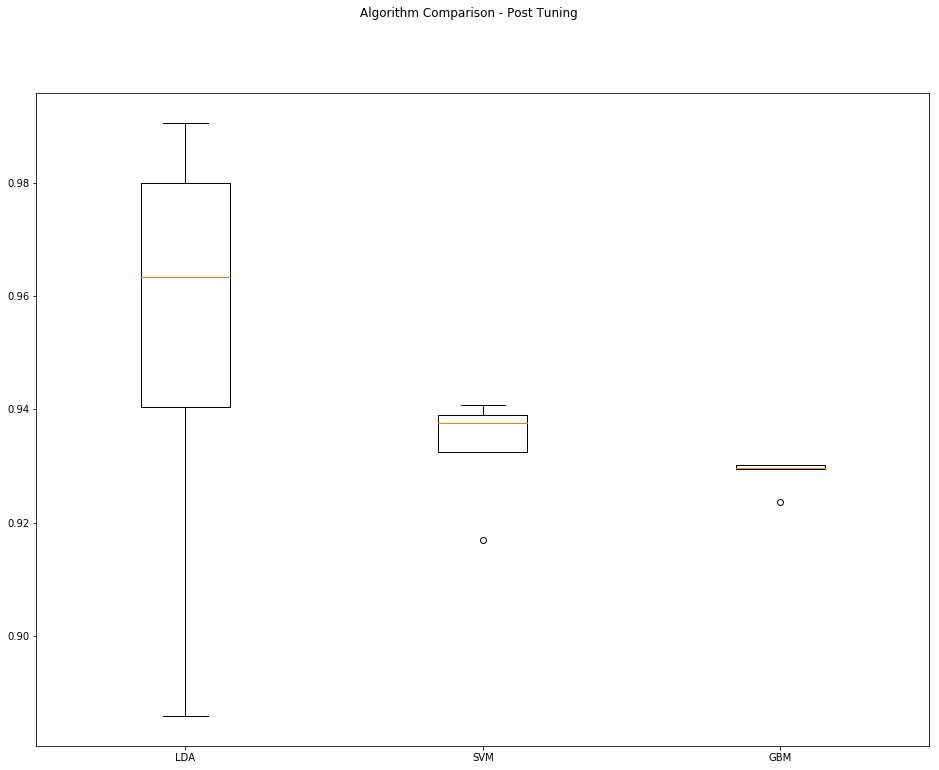

In [28]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [29]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9623345775364778
[[490   6   0   0   0   0]
 [ 11 460   0   0   0   0]
 [  1  14 405   0   0   0]
 [  0   1   0 434  56   0]
 [  0   0   0  22 510   0]
 [  0   0   0   0   0 537]]
             precision    recall  f1-score   support

          1       0.98      0.99      0.98       496
          2       0.96      0.98      0.97       471
          3       1.00      0.96      0.98       420
          4       0.95      0.88      0.92       491
          5       0.90      0.96      0.93       532
          6       1.00      1.00      1.00       537

avg / total       0.96      0.96      0.96      2947



/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### 6.b) Create standalone model on entire training dataset

In [30]:
startTimeModule = datetime.now()
finalModel = LinearDiscriminantAnalysis()
finalModel.fit(X_entire, Y_entire)
print ('Model training time:',(datetime.now() - startTimeModule))

/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model training time: 0:00:01.722428


/home/davidlowe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### 6.c) Save model for later use

In [31]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 8:14:38.772911
